In [1]:
 #IMPORTING LIBRARIES
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout,Flatten

In [4]:
# Importing Data
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [8]:
# Data Reshape
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [9]:
# Build Optimizer Call
def build_optimizer(op):
  model=tf.keras.Sequential()
  model.add(tf.keras.Input(shape=(28,28,1)))
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu'))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [10]:
# Comparing Each Optimizer Accuracy
import os, gc
optimizers=['Adam', 'RMSprop','Adadelta', 'Adagrad', 'SGD']
opt_res=[]
model_res=[]
for i in optimizers:
  model=build_optimizer(i)
  print("Accuracy for: ",i)
  print("\n")
  history=model.fit(x_train,y_train, epochs=5, batch_size=64,verbose=1,validation_data=(x_test, y_test))
  print("\n")
  gc.collect()
  model_res.append(history)
  opt_res.append(history.history['accuracy'])


Accuracy for:  Adam


Epoch 1/5
938/938 [==============================] - 72s 76ms/step - loss: 0.1746 - accuracy: 0.9472 - val_loss: 0.0506 - val_accuracy: 0.9842
Epoch 2/5
938/938 [==============================] - 74s 79ms/step - loss: 0.0571 - accuracy: 0.9833 - val_loss: 0.0437 - val_accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0393 - accuracy: 0.9880 - val_loss: 0.0366 - val_accuracy: 0.9865
Epoch 4/5
938/938 [==============================] - 64s 68ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0298 - val_accuracy: 0.9914
Epoch 5/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.0333 - val_accuracy: 0.9903


Accuracy for:  RMSprop


Epoch 1/5
938/938 [==============================] - 70s 74ms/step - loss: 0.1783 - accuracy: 0.9448 - val_loss: 0.0489 - val_accuracy: 0.9847
Epoch 2/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0546 - accuracy:

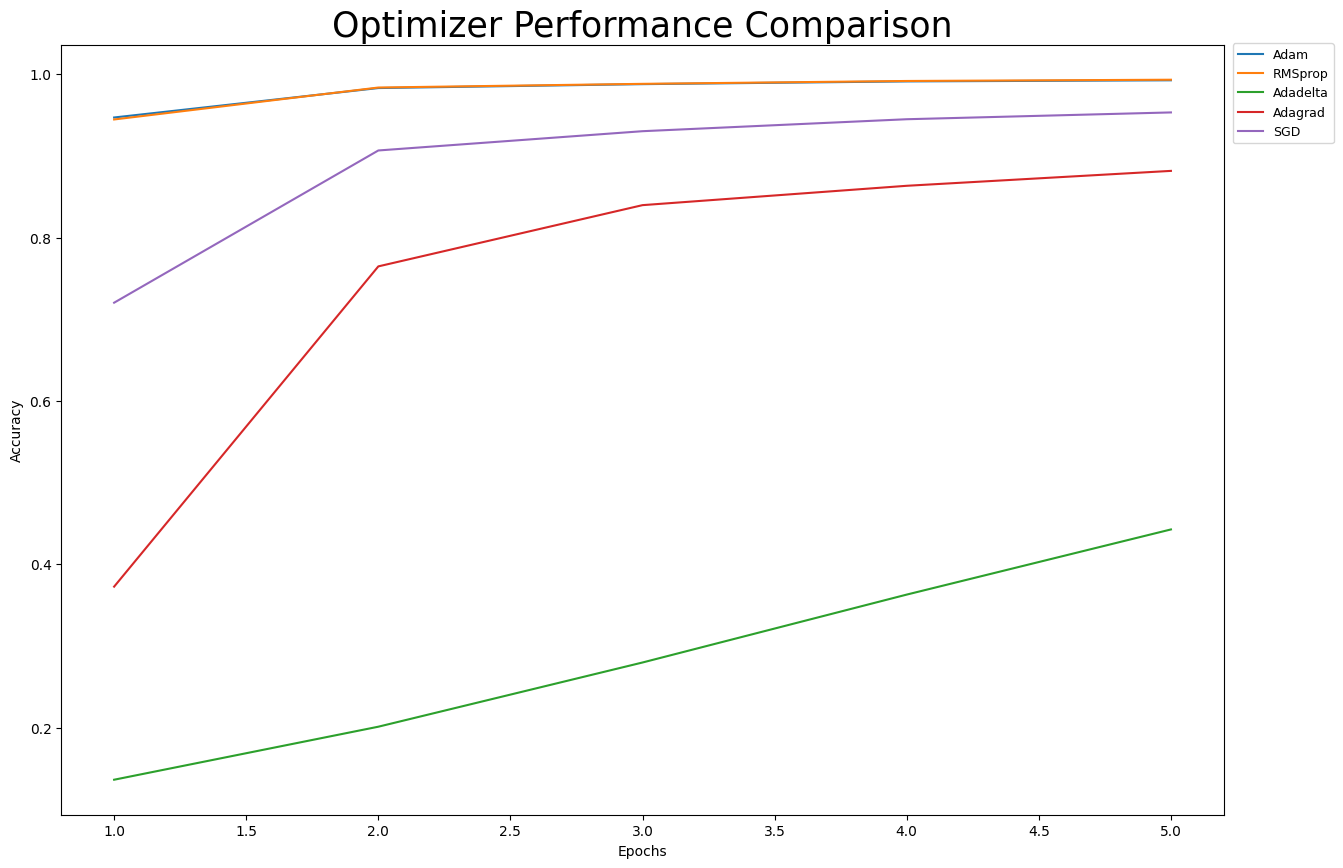

In [11]:
# Plotting Optimizer Accuracy
import matplotlib.pyplot as plt
fully_nested = [list(zip(*[(ix+1,y) for ix,y in enumerate(x)])) for x in opt_res]
names = ['sublist%d'%(i+1) for i in range(len(fully_nested))]
fig = plt.figure(figsize=(15,10))
for l in fully_nested:
  plt.plot(*l)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(optimizers, fontsize=9, loc = 'upper right', bbox_to_anchor=(1.1, 1.01))
plt.title("Optimizer Performance Comparison", fontsize=25)
plt.show()

Adam and RMSprop performed the best in terms of accuracy and loss reduction, with Adam being
slightly better. Adadelta performed poorly, while Adagrad and SGD showed improvement over
epochs but didn’t reach the same level of performance as Adam and RMSprop within the given
epochs.